# Exploring & Predicting Employee Productivity With Machine Learning

## Prepared by
**Author:** Shinin Varongchayakul

**Date:** 10 Apr 2025

**Language:** R  


## Dataset
**Name:** Employee Performance and Productivity Data

**Source:** https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data

**Retrieved Date:** 10 Apr 2025

## 1. Install & Load Necessary Packages

In [ ]:
# Install packages
install.packages("tidyverse") # data manipulation
install.packages("tidymodels") # machine learning
install.packages("data.table") # data manipulation
install.packages("dtplyr") # data manipulation

In [62]:
# Load packages
library(tidyverse)
library(tidymodels)
library(data.table)
library(dtplyr)

## 2. Prepare the Dataset

### 2.1 Load the Dataset

In [63]:
# Store raw CSV URL from GitHub
raw_url <- "https://raw.githubusercontent.com/svarong-port/data-analytics-projects/refs/heads/main/R/employee_productivity/employee_performance_and_productivity_extended_dataset.csv"

# Load the data with fread()
prod <- fread(raw_url)

In [64]:
# Preview the data
head(prod)

Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
<int>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
1,IT,Male,55,Specialist,2022-01-19 08:03:05,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,FALSE
2,Finance,Male,29,Developer,2024-04-18 08:03:05,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,FALSE
3,Finance,Male,55,Specialist,2015-10-26 08:03:05,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,FALSE
4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,FALSE
5,Engineering,Female,36,Analyst,2021-07-23 08:03:05,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,FALSE
6,IT,Male,43,Manager,2016-08-14 08:03:05,8,High School,3,7800,46,31,8,0,100,15,95,0,2.77,FALSE


In [65]:
# View the structure
glimpse(prod)

Rows: 100,000
Columns: 20
$ Employee_ID                 <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…
$ Department                  <chr> "IT", "Finance", "Finance", "Customer Supp…
$ Gender                      <chr> "Male", "Male", "Male", "Female", "Female"…
$ Age                         <int> 55, 29, 55, 48, 36, 43, 37, 55, 55, 45, 52…
$ Job_Title                   <chr> "Specialist", "Developer", "Specialist", "…
$ Hire_Date                   <dttm> 2022-01-19 08:03:05, 2024-04-18 08:03:05,…
$ Years_At_Company            <int> 2, 0, 8, 7, 3, 8, 1, 9, 1, 7, 4, 9, 5, 9, …
$ Education_Level             <chr> "High School", "High School", "High School…
$ Performance_Score           <int> 5, 5, 3, 2, 2, 3, 5, 2, 2, 1, 3, 5, 4, 4, …
$ Monthly_Salary              <dbl> 6750, 7500, 5850, 4800, 4800, 7800, 5250, …
$ Work_Hours_Per_Week         <int> 33, 34, 37, 52, 38, 46, 55, 42, 51, 41, 38…
$ Projects_Handled            <int> 32, 34, 27, 10, 11, 31, 20, 46, 23, 33, 1,…
$ Overtime_Hou

### 2.2 Clean the Dataset

#### 2.2.1 Remove Unnecessary Columns

In [66]:
# Remove unnecessary columns
prod_cleaned <- prod[, -"Employee_ID"]

# Check the result
glimpse(prod_cleaned)

Rows: 100,000
Columns: 19
$ Department                  <chr> "IT", "Finance", "Finance", "Customer Supp…
$ Gender                      <chr> "Male", "Male", "Male", "Female", "Female"…
$ Age                         <int> 55, 29, 55, 48, 36, 43, 37, 55, 55, 45, 52…
$ Job_Title                   <chr> "Specialist", "Developer", "Specialist", "…
$ Hire_Date                   <dttm> 2022-01-19 08:03:05, 2024-04-18 08:03:05,…
$ Years_At_Company            <int> 2, 0, 8, 7, 3, 8, 1, 9, 1, 7, 4, 9, 5, 9, …
$ Education_Level             <chr> "High School", "High School", "High School…
$ Performance_Score           <int> 5, 5, 3, 2, 2, 3, 5, 2, 2, 1, 3, 5, 4, 4, …
$ Monthly_Salary              <dbl> 6750, 7500, 5850, 4800, 4800, 7800, 5250, …
$ Work_Hours_Per_Week         <int> 33, 34, 37, 52, 38, 46, 55, 42, 51, 41, 38…
$ Projects_Handled            <int> 32, 34, 27, 10, 11, 31, 20, 46, 23, 33, 1,…
$ Overtime_Hours              <int> 22, 13, 6, 28, 29, 8, 29, 7, 21, 2, 5, 2, …
$ Sick_Days   

`Employee_ID` has been successfully removed.

#### 2.2.2 Convert `character` Columns to `factor`

In [67]:
# Convert character columns to factor

## Select character columns
char_cols <- names(prod_cleaned)[sapply(prod_cleaned, is.character)]

## Convert to factor
prod_cleaned[, 
             (char_cols) := lapply(.SD, as.factor),
             .SDcols = char_cols]

## Check the result
glimpse(prod_cleaned)

Rows: 100,000
Columns: 19
$ Department                  <fct> IT, Finance, Finance, Customer Support, En…
$ Gender                      <fct> Male, Male, Male, Female, Female, Male, Ma…
$ Age                         <int> 55, 29, 55, 48, 36, 43, 37, 55, 55, 45, 52…
$ Job_Title                   <fct> Specialist, Developer, Specialist, Analyst…
$ Hire_Date                   <dttm> 2022-01-19 08:03:05, 2024-04-18 08:03:05,…
$ Years_At_Company            <int> 2, 0, 8, 7, 3, 8, 1, 9, 1, 7, 4, 9, 5, 9, …
$ Education_Level             <fct> High School, High School, High School, Bac…
$ Performance_Score           <int> 5, 5, 3, 2, 2, 3, 5, 2, 2, 1, 3, 5, 4, 4, …
$ Monthly_Salary              <dbl> 6750, 7500, 5850, 4800, 4800, 7800, 5250, …
$ Work_Hours_Per_Week         <int> 33, 34, 37, 52, 38, 46, 55, 42, 51, 41, 38…
$ Projects_Handled            <int> 32, 34, 27, 10, 11, 31, 20, 46, 23, 33, 1,…
$ Overtime_Hours              <int> 22, 13, 6, 28, 29, 8, 29, 7, 21, 2, 5, 2, …
$ Sick_Days   

All `character` columns have been successfully converted to `factor`.

#### 2.2.3 Convert `Resigned` to `factor`

In [68]:
# Convert `Resigned` to factor
prod_cleaned$Resigned <- factor(prod_cleaned$Resigned,
                                levels = c(FALSE, TRUE),
                                labels = c("No", "Yes"))

# Check the result
glimpse(prod_cleaned)

Rows: 100,000
Columns: 19
$ Department                  <fct> IT, Finance, Finance, Customer Support, En…
$ Gender                      <fct> Male, Male, Male, Female, Female, Male, Ma…
$ Age                         <int> 55, 29, 55, 48, 36, 43, 37, 55, 55, 45, 52…
$ Job_Title                   <fct> Specialist, Developer, Specialist, Analyst…
$ Hire_Date                   <dttm> 2022-01-19 08:03:05, 2024-04-18 08:03:05,…
$ Years_At_Company            <int> 2, 0, 8, 7, 3, 8, 1, 9, 1, 7, 4, 9, 5, 9, …
$ Education_Level             <fct> High School, High School, High School, Bac…
$ Performance_Score           <int> 5, 5, 3, 2, 2, 3, 5, 2, 2, 1, 3, 5, 4, 4, …
$ Monthly_Salary              <dbl> 6750, 7500, 5850, 4800, 4800, 7800, 5250, …
$ Work_Hours_Per_Week         <int> 33, 34, 37, 52, 38, 46, 55, 42, 51, 41, 38…
$ Projects_Handled            <int> 32, 34, 27, 10, 11, 31, 20, 46, 23, 33, 1,…
$ Overtime_Hours              <int> 22, 13, 6, 28, 29, 8, 29, 7, 21, 2, 5, 2, …
$ Sick_Days   

`Resigned` has been successfully convert to `factor`.

#### 2.2.4 Convert `Hire_Date` to `Date` Type

In [69]:
# Convert `Hire_Date` to Date type
prod_cleaned[, Hire_Date := as.Date(Hire_Date)]

# Check the result
glimpse(prod_cleaned)

Rows: 100,000
Columns: 19
$ Department                  <fct> IT, Finance, Finance, Customer Support, En…
$ Gender                      <fct> Male, Male, Male, Female, Female, Male, Ma…
$ Age                         <int> 55, 29, 55, 48, 36, 43, 37, 55, 55, 45, 52…
$ Job_Title                   <fct> Specialist, Developer, Specialist, Analyst…
$ Hire_Date                   <date> 2022-01-19, 2024-04-18, 2015-10-26, 2016-…
$ Years_At_Company            <int> 2, 0, 8, 7, 3, 8, 1, 9, 1, 7, 4, 9, 5, 9, …
$ Education_Level             <fct> High School, High School, High School, Bac…
$ Performance_Score           <int> 5, 5, 3, 2, 2, 3, 5, 2, 2, 1, 3, 5, 4, 4, …
$ Monthly_Salary              <dbl> 6750, 7500, 5850, 4800, 4800, 7800, 5250, …
$ Work_Hours_Per_Week         <int> 33, 34, 37, 52, 38, 46, 55, 42, 51, 41, 38…
$ Projects_Handled            <int> 32, 34, 27, 10, 11, 31, 20, 46, 23, 33, 1,…
$ Overtime_Hours              <int> 22, 13, 6, 28, 29, 8, 29, 7, 21, 2, 5, 2, …
$ Sick_Days   

`Hire_Date` has been successfully converted to `Date` type.

#### 2.2.5 Update `Years_At_Company`

In [70]:
# Update `Years_At_Company`

## Store today's date
today_date <- as.Date("2025-04-10")

## Update
prod_cleaned[, Years_At_Company := as.integer(format(today_date, "%Y")) - year(Hire_Date)]

## Check the result
glimpse(prod_cleaned)

Rows: 100,000
Columns: 19
$ Department                  <fct> IT, Finance, Finance, Customer Support, En…
$ Gender                      <fct> Male, Male, Male, Female, Female, Male, Ma…
$ Age                         <int> 55, 29, 55, 48, 36, 43, 37, 55, 55, 45, 52…
$ Job_Title                   <fct> Specialist, Developer, Specialist, Analyst…
$ Hire_Date                   <date> 2022-01-19, 2024-04-18, 2015-10-26, 2016-…
$ Years_At_Company            <int> 3, 1, 10, 9, 4, 9, 2, 11, 2, 9, 6, 10, 6, …
$ Education_Level             <fct> High School, High School, High School, Bac…
$ Performance_Score           <int> 5, 5, 3, 2, 2, 3, 5, 2, 2, 1, 3, 5, 4, 4, …
$ Monthly_Salary              <dbl> 6750, 7500, 5850, 4800, 4800, 7800, 5250, …
$ Work_Hours_Per_Week         <int> 33, 34, 37, 52, 38, 46, 55, 42, 51, 41, 38…
$ Projects_Handled            <int> 32, 34, 27, 10, 11, 31, 20, 46, 23, 33, 1,…
$ Overtime_Hours              <int> 22, 13, 6, 28, 29, 8, 29, 7, 21, 2, 5, 2, …
$ Sick_Days   

`Years_At_Company` has been successfully updated.

## 3. EDA, Part 1 – Demopgrahic Variables

In this section, I will explore the demographic characteristics of the sample:
1. Gender
2. Age
3. Education level

In [71]:
# Create a copy of the dataset for EDA
prod_eda <- copy(prod_cleaned) 

### 3.1 Gender

In [72]:
# Compute the number of employees by gender
prod_eda[,
         .(Total = .N,
           Percent = .N / nrow(prod_eda) * 100),
         by = Gender][order(-Percent)]

Gender,Total,Percent
<fct>,<int>,<dbl>
Male,48031,48.031
Female,48001,48.001
Other,3968,3.968


There is the same number of employees in across the two genders.

### 3.2 Age

In [73]:
# Compute the mean and SD of age
prod_eda[, .(Min = round(min(Age), 2),
             Mean = round(mean(Age), 2),
             Max = round(max(Age), 2),
             SD = round(sd(Age), 2))]

Min,Mean,Max,SD
<dbl>,<dbl>,<dbl>,<dbl>
22,41.03,60,11.24


The youngest employee is 22 and the oldest 60.

The mean age is 60 with SD of 11.24.

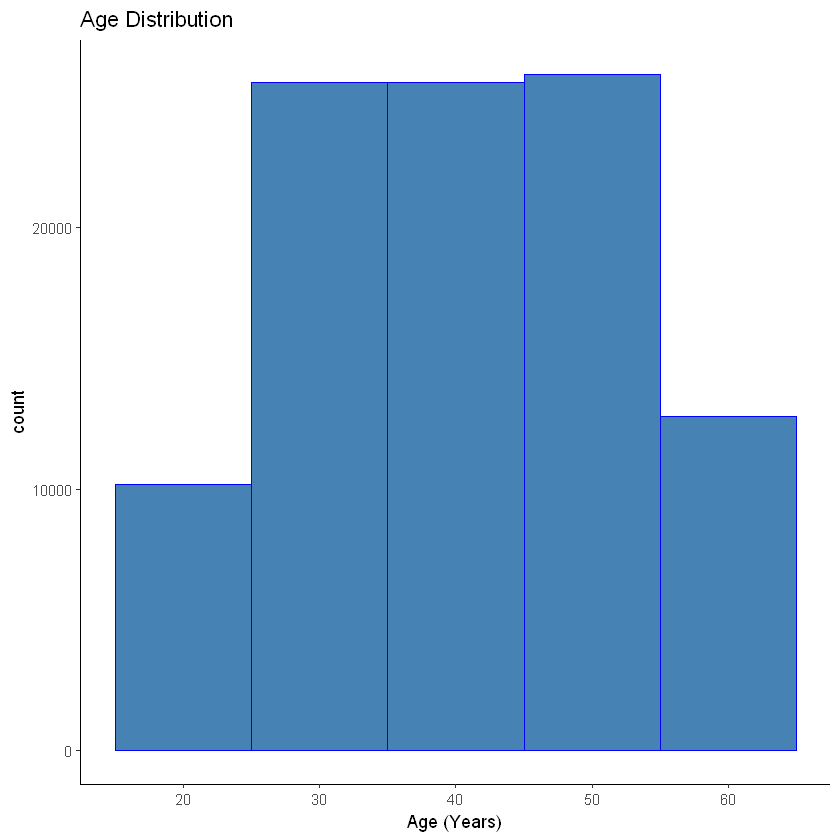

In [74]:
# Visualise age distribution
prod_eda |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Age)) +
  
  ## Instantiate a histogram
  geom_histogram(binwidth = 10,
                 color = "blue",
                 fill = "steelblue") +
  
  ## Add text elements
  labs(title = "Age Distribution",
       x = "Age (Years)") +
  
  ## Apply classic theme
  theme_classic()

Age appears normally distributed, with most employees clustering between the age of 30 and 60.

### 3.3 Education Level

In [75]:
# Compute the number of employees by education level

## Reorder the education level factors
prod_eda[, Education_Level := factor(Education_Level,
                                     levels = c("High School",
                                                "Bachelor",
                                                "Master",
                                                "PhD"))]

## Compute
prod_eda[, 
         .(Total = .N,
           Percent = .N / nrow(prod_eda) * 100),
         by = Education_Level][order(Education_Level)]

Education_Level,Total,Percent
<fct>,<int>,<dbl>
High School,30004,30.004
Bachelor,50041,50.041
Master,14904,14.904
PhD,5051,5.051


Most of the employees graduated either with a Bachelor's degree (50%) or a High School certificate (30%).

The rest hold a graduate degree (Master's degree = 15%; PhD = 5%).

## 4. EDA, Part 2 – Job-Related Variables

In this section, I will explore the job-related characteristics:
1. Department
2. Team size
3. Job title
4. Hire date
5. Resgination status

### 4.1 Department

In [76]:
# Compute the number of employees by department
prod_eda[,
         .(Total = .N,
           Percent = .N / nrow(prod_eda) * 100),
         by = Department][order(-Percent)]

Department,Total,Percent
<fct>,<int>,<dbl>
Marketing,11216,11.216
Finance,11200,11.200
Operations,11181,11.181
IT,11131,11.131
Sales,11122,11.122
Legal,11118,11.118
Customer Support,11116,11.116
HR,10960,10.960
Engineering,10956,10.956


There is about the same number of employees in each department.

### 4.2 Team Size

In [77]:
# Compute the number of employees by team size
prod_eda[, 
         .(Total = .N,
           Percent = .N / nrow(prod_eda) * 100),
         by = Team_Size][order(Team_Size)]

Team_Size,Total,Percent
<int>,<int>,<dbl>
1,5287,5.287
2,5272,5.272
3,5298,5.298
4,5309,5.309
5,5279,5.279
6,5164,5.164
7,5218,5.218
8,5242,5.242
9,5159,5.159


There is around the same number of employees across team sizes.

The minimum team size is 1 and the largest 19.

### 4.3 Job Title

In [78]:
# Compute the number of employees by job title
prod_eda[,
         .(Total = .N,
           Percent = .N / nrow(prod_eda) * 100),
         by = Job_Title][order(Job_Title)]

Job_Title,Total,Percent
<fct>,<int>,<dbl>
Analyst,14261,14.261
Consultant,14210,14.210
Developer,14195,14.195
Engineer,14217,14.217
Manager,14325,14.325
Specialist,14507,14.507
Technician,14285,14.285


There is the similar number of employees in each job title.

### 4.4 Hire Date

In [79]:
# Find hire year and hire month
prod_eda[, `:=` (Hire_Year = year(Hire_Date),
                 Hire_Month_Name = month(Hire_Date))]

In [80]:
# Compute the number of hires per year
hires_by_year <- prod_eda[,
                          .(Count = .N),
                          by = Hire_Year][order(Hire_Year)]

# Print the results
hires_by_year

Hire_Year,Count
<int>,<int>
2014,3097
2015,9886
2016,9874
2017,10004
2018,10005
2019,9936
2020,10096
2021,10094
2022,10145


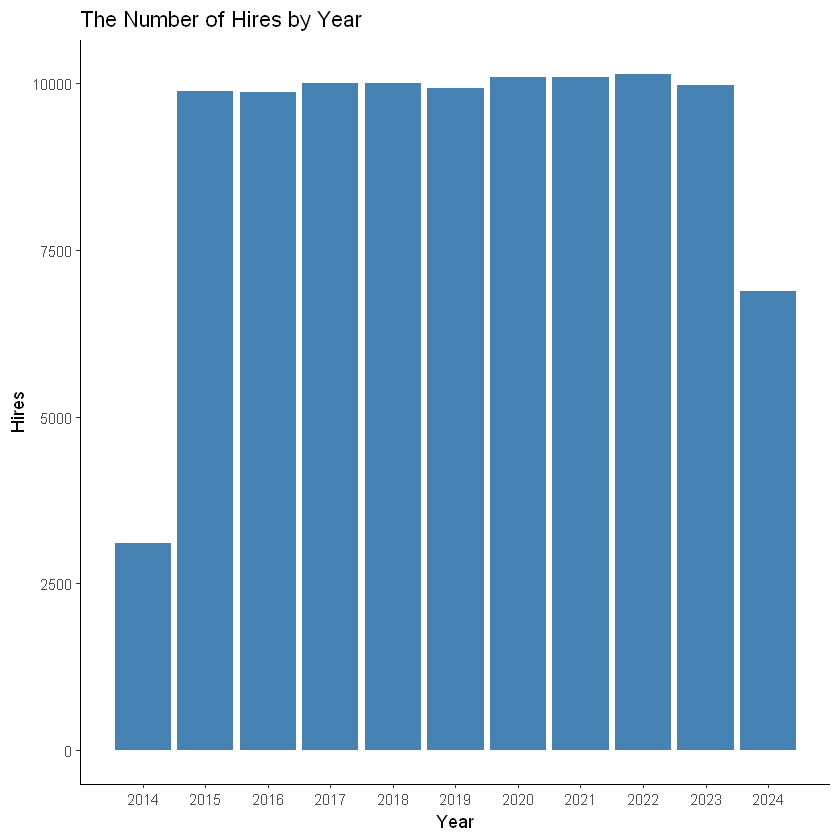

In [81]:
# Plot the number of employees by hire year
hires_by_year |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Hire_Year,
             y = Count)) +
  
  ## Instantiate a line plot
  geom_col(fill = "steelblue") +
  
  ## Add text elements
  labs(title = "The Number of Hires by Year",
       x = "Year",
       y = "Hires") +
  
  ## Adjust classic theme
  theme_classic() +
  
  ## Add x scale
  scale_x_continuous(breaks = 2014:2024)

The data ranges between 2014 and 2024.

For all years, excep 2014 and 2024, there were around 1,000 hires a year.

The year 2014 saw the lowest number of hires at around 3,000 hires.

In 2024, there were around 7,000 hires.

In [82]:
# Compute the average number of hires by month
hires_by_month <- prod_eda[,
                           Hire_Month_Name := as.factor(Hire_Month_Name)][,
                                                                          .(Avg_Hires = .N / uniqueN(year(Hire_Date))),
                                                                          by = Hire_Month_Name][order(Hire_Month_Name)]

# Print the results
hires_by_month

Hire_Month_Name,Avg_Hires
<fct>,<dbl>
1,840.6000
2,781.5000
3,840.2000
4,816.7000
5,849.0000
6,825.4000
7,847.7000
8,844.5000
9,754.5455


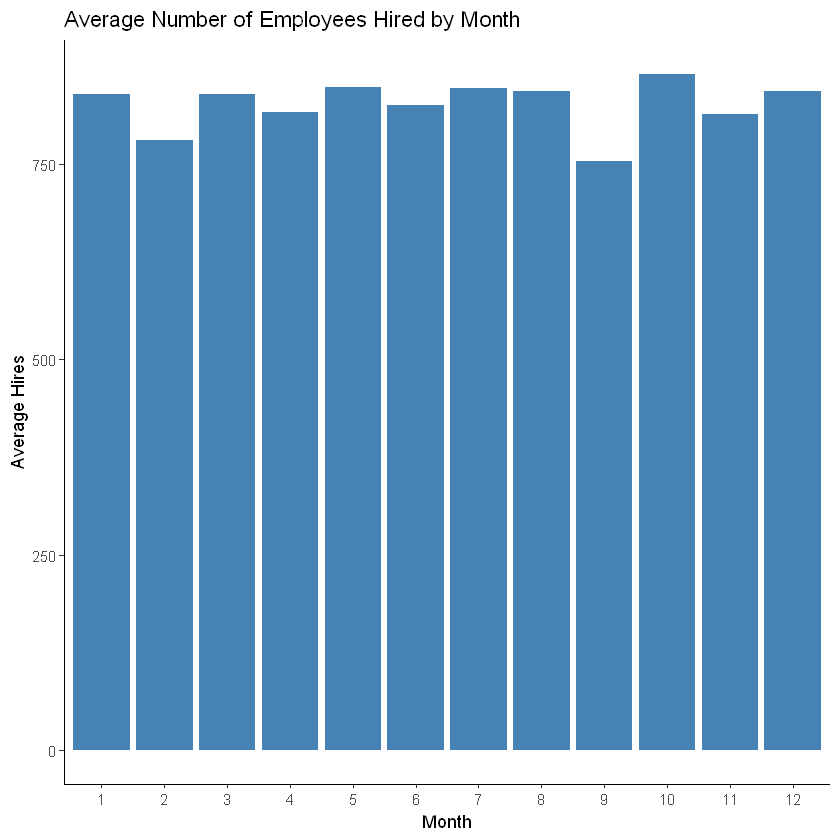

In [83]:
# Plot the number of employees by month
hires_by_month |>

  ## Aesthetic mapping
  ggplot(aes(x = Hire_Month_Name,
             y = Avg_Hires)) +
  
  ## Instantiate a line plot
  geom_col(fill = "steelblue") +
  
  ## Add text elements
  labs(title = "Average Number of Employees Hired by Month",
       x = "Month",
       y = "Average Hires") +
  
  ## Adjust classic theme
  theme_classic()

The number of monthly hires is between 750 and 860.

Feburary and September have the lowest average number of hires.

The other months have on average over 800 hires.

### 4.3 Resignation Status

In [84]:
# Compute the number of employees by resignation status
prod_eda[,
         .(Count = .N,
             Percent = .N / nrow(prod_eda) * 100),
         by = Resigned]

Resigned,Count,Percent
<fct>,<int>,<dbl>
No,89990,89.99
Yes,10010,10.01


The majority of the employees (around 90%) are still working for the company.

## 5. EDA, Part 3 – Performance & Engagement

In this section, I will explore the variables related to performance and engagement:
1. Performance score
2. Monthly salary
3. Promotions
4. Projects handled
5. Work hours per week
6. Overtime hours
7. Sick days
8. Training hours
9. Remote work frequency
10. Satisfaction scores

### 5.1 Performance Score

### 5.2 Monthly Salary

### 5.3 Promotions

### 5.4 Projects Handled

### 5.5 Work Hours Per Week

### 5.6 Overtime Hours

### 5.7 Sick Days

### 5.8 Training Hours

### 5.9 Remote Work Frequency

### 5.10 Satisfaction Scores

## 6. EDA, Part 4 – Potential Predictors of Performance

In this section, I will explore potential predictors of performance:
1. Work hours
2. Overtime hours
3. Sick days

4. Remote work frequency
5. Team size

6. Education level
7. Training hours
8. Project handled
9. Years at company

9. Age
10. Monthly salary